## Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")
check = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286796,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.691668,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

In [7]:
# FOR PLOTTING
# housing.hist(bins=50, figsize=(20,15))

## Train Test Splitting

In [8]:
import numpy as np

#FOR LEARNING PURPOSES
# def split_train_test(data, test_ratio): #In this function we will split the data into train and test sets, so that we can train them and test them using regression
#     np.random.seed(42) #It fixed the random shuffled values after shuffling once and it will be the same data always after once it is shuffled
#     shuffled = np.random.permutation(len(data)) # It wil shuffle the rows of the data so that we get random values for training and random for testing no in the pre arranged order of data
#     test_set_size = int(len(data) * test_ratio) #Now from the shuffled rows we will chose random percentage of data for training using this line and will store the set in the given variable
# #Note: The ratio will be between 0 to 1 so that it split the data as per given ratio(Ex: 0.8 ratio of 500 data points is 400 data points)
#     test_indices = shuffled[:test_set_size] #Now in this line we split data from 1st data point till the split length of data
#     train_indices = shuffled[test_set_size:] #In this it will store the data from split length till the last data point for testing
#     return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
#train_set, test_set = split_train_test(housing, 0.2) #Passing the values through finction parameter and getting the split of data and strong them in our data variables

In [10]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [11]:
from sklearn.model_selection import train_test_split #This is a already defined function, this is same function we manually programmed earlier, so we can use it directly
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [12]:
housing.get('CHAS')

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [13]:
#NOTE: We split the data in equal ratio, which are only in binary form so that if we are splitting the data for training we dont miss the data and can cause bad predictions
from sklearn.model_selection import StratifiedShuffleSplit #They will be split in the given ratio
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Now using this function we will tell the function to split the data of particular feature in two sets that both contain the both binary value, so that it can train and test them perfectly without missing one type out of two
for train_index, test_index in split.split(housing, housing['CHAS']): #Now the balanced split for test is stored in test index and train is stored in train index variables
    strat_train_set = housing.loc[train_index] #Now the statified splitted train data is stored in strat_train_set
    strat_test_set = housing.loc[test_index] #And the stratified splitted test data is stored in strat_test_set

In [14]:
housing = strat_train_set.copy() #Replacing our whole data set with only training data set(because we are only going to work on train data set)

## Looking for Correlations

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False) #Checking the correlations between MEDV(price) and other atrributes
#NOTE: It shows the effect of a attribute on the price of houses

MEDV       1.000000
RM         0.684739
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

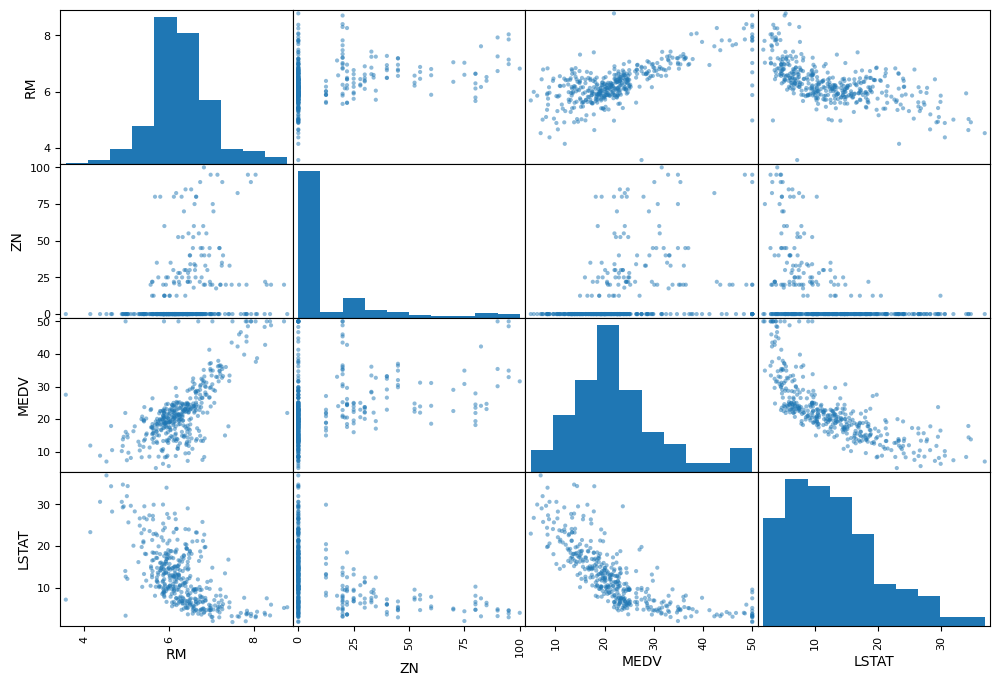

In [17]:
from pandas.plotting import scatter_matrix
attr = ['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(housing[attr], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

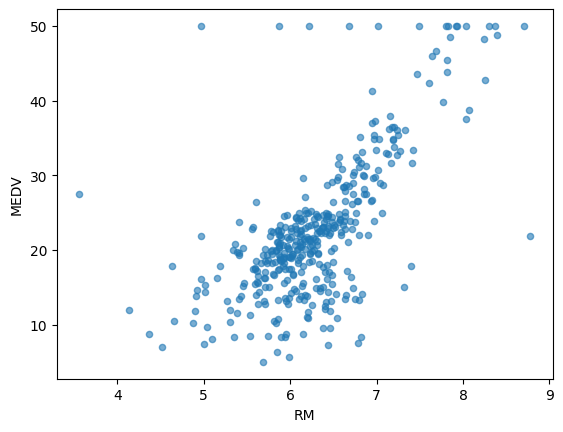

In [18]:
housing.plot(kind='scatter', x='RM', y="MEDV", alpha=0.6)
#NOTE: As we can see some outlier which can effect our training model, so be looking at graph we can chose and remove them for a good ML model for better predictions

## Trying Attribute Combinations

In [19]:
housing['TAXRM'] =  housing['TAX']/housing['RM'] #Creating new attribute called TAXRM out of TAX and RM(pre-existed attributes), it will tell us about the tax per room of a house we are going to buy

In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) #Now here we can see a strong negative correlation between MEDV(price) and TAXRM.
#NOTE: It means if a house having high tax per room then the pricing of the house will be lower

MEDV       1.000000
RM         0.684739
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.534348
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

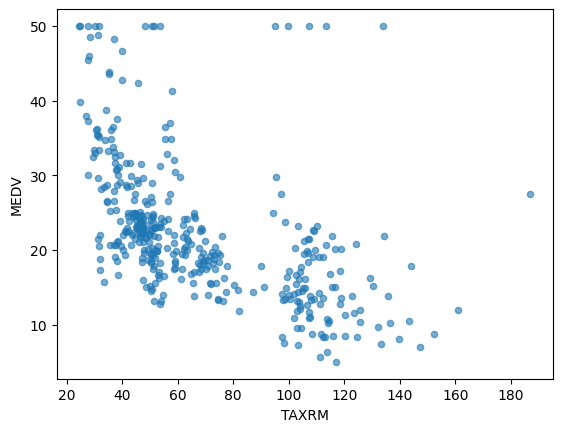

In [21]:
housing.plot(kind='scatter', x='TAXRM', y="MEDV", alpha=0.6)

In [22]:
housing = strat_train_set.drop('MEDV', axis=1) #Here, I am removing the label column because in the train function paramenter, we have to give features and labels in seperate variables
housing_labels = strat_train_set['MEDV'].copy() #And here i am creating new variable which will hold the values of labels

## Missing Attributes

In [23]:
# To take care of missing attributes, you have three options:
#     1. Get rid of data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or Median)

In [24]:
# a = housing.dropna(subset=['RM']) #Option 1
# a.shape
#Here it will create a new modified data base which is now without those RM rows in which data is missing

In [25]:
# housing.drop('RM', axis=1) #option 2

In [26]:
# median = housing['RM'].median() #Option 3

In [27]:
# housing['RM'].fillna(median) #Here if will fill the null values of RM with median of RM

In [28]:
#NOTE: In all 3 given options it will not modify the original data file untill we will add 'inplace=True', it will create new copy and it will store the changes in a given variable
# It is also possible that we get null value input for prediction, so there as well we will put our median value at the place of null value

In [29]:
housing.describe() #Data before filling the missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282564,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.699553,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median") #It will does the same thing we did before to fill our missing attribute and not only in RM, it will insert in all missing data of all given attribute with their median values
imputer.fit(housing) #It will calculate all the median values of all attribute

SimpleImputer(strategy='median')

In [31]:
X =  imputer.transform(housing) #Now this function will put all median values of that attribute in place of their NaN values

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns) #Here we are creating new data frame called housing_tr, where we are inserting our modified data and labelling them with columns method
housing_tr.describe()
#NOTE: Our imputed data is stored in new variable housing_tr not in housing data variable, which is still untouched

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281678,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.695245,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarily, There are three types of objects:

    1. Estimators - It estimate some parameter based on a dataset. Eg. Imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters 
    
    2. Transformers - Transform method - Take the fitted values as input and insert them inplace where the data is missing or need to be inserted based on learnings from fit function. It also has a convenience function called fit_transform().  
    
    3. Predictors - LinearRegression model is an example of predictor, fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

## Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
#    ....add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])
#So, In pipelining we will add bunch of classes and functions, which will get execute on our data before it will be ready for training.
#It basically means implimenting some practices on our data which are necessary for our data to be ready for training.
#We put our data in pipeline function and it automaticlly execute all classes and functions on our data and store the processed data in our variable, We can add classes and function as per our need.
#NOTE: As you have seen earlier we have execute our imputer function on the data but when we are creating pipeline we dont need to perform them seperately.
#Also create the pipeline early and then you can just pass data through to get processed data

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing) #Here, we are executing pipeline on our housing data again and it will impute and scale our data using fit and transform functions and will store in new variable called housing_num_tr
housing_num_tr
#NOTE: Earlier we impute our housing data and stored it in housing tr variable but here we are imputing the housing data again but this time storing in housing_num_tr variabe to see if pipeling is working or not.

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a Desired Model

In [35]:
# We are testing different regression  odels on our data to find the best one
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression() 
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels) #Training our data with linear regression model, giving feature and label variable to our model and training them using fit function

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:5] #Now slicing few data rows for predicting

In [37]:
some_labels = housing_labels.iloc[:5] #Taking the labels for same features to match prediction with them

In [38]:
prepared_data = my_pipeline.transform(some_data) #Preparing data using pipeline function

In [39]:
model.predict(prepared_data) #Now giving features are input and getting the prediction labels of output

array([22.286, 25.755, 16.511, 23.451, 23.569])

In [40]:
list(some_labels) #Actual values

[21.9, 24.5, 16.7, 23.1, 23.0]

In [41]:
# test_labels #Comparing

## Evaluating the Model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr) #Now we are working on whole train data set
mse = mean_squared_error(housing_labels, housing_predictions) 
rmse = np.sqrt(mse) #Calculating mean squared error of actual and predicted values

In [43]:
rmse

1.226952664769165

### Using better Evaluation Techniques - Cross Validations

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# So, the cross validation is a technique in which we take trial data set to train and test them number of time by slicing different portions and then we train one part and test another and find the rmse
# we repeat this process until we train and test every of part of train data set, we can create as many part as we required
# NOTE: In this process for ex: we have data set we split it into 10 parts and in very loop we train 9 parts and test on 1 part of data set and get rmse, after repeating process for all parts to be tested at the end we get 10 rmse
# This process help us to ignore overfitting of some models when testing on its own train data set

In [45]:
rmse_scores

array([2.87954053, 2.85300454, 4.49083524, 2.63301732, 4.51077798,
       2.86692682, 4.23636137, 3.47085754, 3.02636292, 3.21014671])

In [46]:
def print_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())
# It will give us the mean and standard deviation of our cross validation values

In [47]:
print_scores(rmse_scores)

Scores:  [2.87954053 2.85300454 4.49083524 2.63301732 4.51077798 2.86692682
 4.23636137 3.47085754 3.02636292 3.21014671]
Mean:  3.417783097848443
Standard Deviation:  0.6887139074429974


## Saving the Model

In [48]:
from joblib import dump, load
dump(model, 'Project_model.joblib') #Saving our model as a file, so that we can acces our model and predict labels using this model file

['Project_model.joblib']

## Testing the Model on Test Data Set 

In [49]:
test_feature = strat_test_set.drop('MEDV', axis=1) #Taking only feature out of test set, so that we can predict our labels
test_labels = strat_test_set['MEDV'].copy() #Taking labels in a different variable to compare and find the loss functions of the predictions

In [50]:
test_feature_pre = my_pipeline.fit_transform(test_feature) #Fitting our test data like our train data using pipeline so that the data behave or works same as train data and to avoid any errors in predictions

In [51]:
final_predictions = model.predict(test_feature_pre) #Predicting our labels by giving them features of test data set
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse) #Finding error value of prediction

In [52]:
final_rmse

3.319030646344283

## Using the Model

In [53]:
from joblib import dump, load
import numpy as np
model = load('Project_model.joblib')

In [54]:
features = np.array([[ 0.25823276, -0.4898311 ,  0.98336806, -0.27288841,  0.21362409,
       -0.24147771,  0.38125117, -0.09554671,  1.63579367,  1.50571521,
        0.81196637,  0.40945357,  0.30281693]])
model.predict(features)

array([19.085])